In [1]:
from scipy.io import loadmat
#loading the data 
train_data = loadmat(r'D:\Users\kpgaj\Downloads\train_32x32.mat')
test_data = loadmat(r'D:\Users\kpgaj\Downloads\test_32x32.mat')

In [2]:
# segregating as test and train data
X_train, y_train = train_data['X'],train_data['y']
X_test , y_test = test_data['X'],test_data['y']

In [3]:
# shape of the tran and test data 
print("training set" + str(X_train.shape) + str(y_train.shape) )

print("test set" + str(X_test.shape) + str(y_test.shape) )


training set(32, 32, 3, 73257)(73257, 1)
test set(32, 32, 3, 26032)(26032, 1)


In [4]:
#transposing the train and test data sets 
X_train, y_train = X_train.transpose(3,0,1,2), y_train[:,0] 
X_test , y_test = X_test.transpose(3,0,1,2) , y_test[:,0]

print("training set" + str(X_train.shape) + str(y_train.shape) )

print("test set" + str(X_test.shape) + str(y_test.shape) )

training set(73257, 32, 32, 3)(73257,)
test set(26032, 32, 32, 3)(26032,)


Populating the interactive namespace from numpy and matplotlib


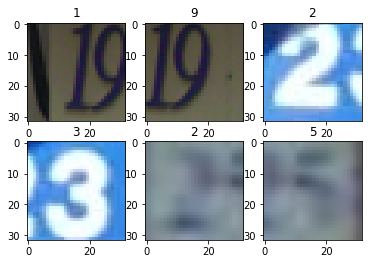

In [5]:
# plotting some train images for sample
%pylab inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

fig, axs = plt.subplots(2,3)    
for i,ax in enumerate(axs.flat):
    imgplot = ax.imshow(X_train[i])
    
    ax.set_title(y_train[i])
    
    
    
    

In [6]:
#printting lables
import numpy as np
print(np.unique(y_train))




[ 1  2  3  4  5  6  7  8  9 10]


In [7]:
#converting 10 to 0

y_train[y_train == 10 ] = 0
y_test[y_test == 10 ] = 0

In [8]:
#splitting the data into validation and train
from sklearn.model_selection import train_test_split
X_tra, X_val, y_train , y_val = train_test_split(X_train,y_train,test_size = 0.15,random_state = 4)


In [9]:

rgb_to_gray = [0.2990, 0.5870, 0.1140]

X_tra = np.expand_dims(np.dot(X_tra,rgb_to_gray),axis = 3)
X_val = np.expand_dims(np.dot(X_val,rgb_to_gray),axis = 3)
X_test = np.expand_dims(np.dot(X_test,rgb_to_gray),axis = 3)


In [10]:
X_tra = X_tra.astype('float32')
X_val = X_val.astype('float32')
X_test = X_test.astype('float32')



In [11]:
#Normalazing data

mean_train = np.mean(X_tra,axis = 0)

std_train = np.std(X_tra,axis= 0)

X_norm_train = (X_train - mean_train)/std_train

X_val_train = (X_val - mean_train)/std_train

X_test_train = (X_test - mean_train)/std_train

In [12]:
from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train)
y_val = np_utils.to_categorical(y_val)
y_test = np_utils.to_categorical(y_test)

C:\Users\kpgaj\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
C:\Users\kpgaj\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\kpgaj\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])

In [17]:
#CNN with four convolution layer
import keras
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout,  BatchNormalization
from keras.models import Sequential

def model():
    model = Sequential()
    model.add(Conv2D(filters=64, kernel_size=(5,5), padding='same', activation='relu', input_shape=(32,32,1)))
    model.add(BatchNormalization())
    
    
    model.add(Conv2D(filters=32, kernel_size=(5,5), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2,2), strides=2))
    model.add(Dropout(0.2))
    
    model.add(Conv2D(filters=64, kernel_size=(5,5), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
        
    model.add(Conv2D(filters=128, kernel_size=(5,5), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=(2,2), strides=2))
    model.add(Dropout(0.2))
    
    
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(BatchNormalization())
    
    model.add(Dropout(0.2))
    model.add(Dense(64, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Dense(10, activation='softmax'))
    #compiling the model
    model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
    return model
              
model = model()
              
model.fit(X_tra,y_train,batch_size=64,epochs=5,verbose=1,validation_data=(X_val,y_val))

              

Train on 62268 samples, validate on 10989 samples
Epoch 1/5
62268/62268 [==============================] - 3335s 54ms/step - loss: 0.7131 - acc: 0.7768 - val_loss: 0.4738 - val_acc: 0.8622
Epoch 2/5
62268/62268 [==============================] - 3437s 55ms/step - loss: 0.3759 - acc: 0.8856 - val_loss: 0.3064 - val_acc: 0.9088
Epoch 3/5
62268/62268 [==============================] - 3424s 55ms/step - loss: 0.3051 - acc: 0.9080 - val_loss: 0.3974 - val_acc: 0.8761
Epoch 4/5
62268/62268 [==============================] - 3308s 53ms/step - loss: 0.2512 - acc: 0.9264 - val_loss: 0.2614 - val_acc: 0.9245
Epoch 5/5
62268/62268 [==============================] - 3526s 57ms/step - loss: 0.2113 - acc: 0.9389 - val_loss: 0.2377 - val_acc: 0.9342


In [18]:
scores = model.evaluate(X_test, y_test, verbose = 1)

26032/26032 [==============================] - 357s 14ms/step


In [19]:
print(scores)

[0.24116284394443274, 0.9313921327596804]
